In [124]:
import pandas_datareader as pdr
key = "d3bb0d2862ebaa32d2e1da5d0573d187a7dd3fdd"

In [202]:
df =pdr.get_data_tiingo('DOW',api_key= key)

<ipython-input-202-2a806ed8c989>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df =pdr.get_data_tiingo('DOW',api_key= key)


In [203]:
df.to_csv('DOW.csv')

In [204]:
import pandas as pd

In [205]:
df = pd.read_csv('DOW.csv')

In [206]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,DOW,2019-03-20 00:00:00+00:00,49.80,53.50,49.50,52.75,2350838,41.325423,44.395785,41.076474,43.773414,2350838,0.0,1.0
1,DOW,2019-03-21 00:00:00+00:00,48.98,50.00,48.20,49.99,1764671,40.644964,41.491388,39.997698,41.483090,1764671,0.0,1.0
2,DOW,2019-03-22 00:00:00+00:00,48.60,49.95,48.16,48.80,844690,40.329629,41.449897,39.964505,40.495595,844690,0.0,1.0
3,DOW,2019-03-25 00:00:00+00:00,49.15,49.40,48.00,48.60,440892,40.786034,40.993491,39.831733,40.329629,440892,0.0,1.0
4,DOW,2019-03-26 00:00:00+00:00,48.85,49.75,48.18,49.00,504734,40.537086,41.283931,39.981102,40.661560,504734,0.0,1.0


In [207]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
905,DOW,2022-10-20 00:00:00+00:00,44.93,47.63,44.900,45.39,9259900,44.93,47.63,44.900,45.39,9259900,0.0,1.0
906,DOW,2022-10-21 00:00:00+00:00,46.87,46.92,44.950,45.02,7483602,46.87,46.92,44.950,45.02,7483602,0.0,1.0
907,DOW,2022-10-24 00:00:00+00:00,47.04,47.31,46.330,46.89,5645709,47.04,47.31,46.330,46.89,5645709,0.0,1.0
908,DOW,2022-10-25 00:00:00+00:00,47.85,47.94,46.535,46.71,5202539,47.85,47.94,46.535,46.71,5202539,0.0,1.0
909,DOW,2022-10-26 00:00:00+00:00,47.99,48.55,47.890,48.00,6021020,47.99,48.55,47.890,48.00,6021020,0.0,1.0


In [208]:
df1 = df.reset_index()['close']

In [209]:
df1.shape

(910,)

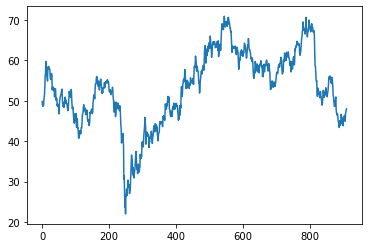

In [210]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [211]:
### LSTM is sensitive to the scake of data. so we apply MinMax scaler

In [212]:
import numpy as np

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [214]:
df1

array([[0.56839092],
       [0.55162543],
       [0.54385606],
       [0.55510121],
       [0.54896749],
       [0.57452464],
       [0.58985892],
       [0.60580658],
       [0.64404007],
       [0.70026579],
       [0.7131466 ],
       [0.77100797],
       [0.72050705],
       [0.71866694],
       [0.70067471],
       [0.68922511],
       [0.67245962],
       [0.74217951],
       [0.73154774],
       [0.74626866],
       [0.74258843],
       [0.73134328],
       [0.73379677],
       [0.72868534],
       [0.69474545],
       [0.68145574],
       [0.67982008],
       [0.68493151],
       [0.71007974],
       [0.69781231],
       [0.6276835 ],
       [0.63995093],
       [0.64322224],
       [0.63279493],
       [0.62318544],
       [0.63238602],
       [0.63524842],
       [0.5919035 ],
       [0.62318544],
       [0.63279493],
       [0.6334083 ],
       [0.58883664],
       [0.57411572],
       [0.58536087],
       [0.57677367],
       [0.54610509],
       [0.55612349],
       [0.543

In [215]:
##splitting data set into train and test split
training_size =int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [216]:
training_size,test_size

(591, 319)

In [217]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0] ###{=0,0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return numpy.array(dataX),numpy.array(dataY)


In [218]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(test_data,time_step)
X_test,y_test =create_dataset(test_data,time_step)

In [219]:
print(X_train)

[[0.77918626 0.81803312 0.81680638 ... 0.66223676 0.66816602 0.64035984]
 [0.81803312 0.81680638 0.81517072 ... 0.66816602 0.64035984 0.65180945]
 [0.81680638 0.81517072 0.83009609 ... 0.64035984 0.65180945 0.65508076]
 ...
 [0.94009405 0.94275199 0.94254754 ... 0.49846657 0.47290943 0.46882028]
 [0.94275199 0.94254754 0.92067062 ... 0.47290943 0.46882028 0.50848497]
 [0.94254754 0.92067062 0.92148845 ... 0.46882028 0.50848497 0.51196074]]


In [220]:
print(X_test.shape),print(y_test.shape)

(218, 100)
(218,)


(None, None)

In [221]:
#reshape input to be[samples.time steps,features] which is required for LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [222]:
### create a LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [223]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [224]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [225]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 9s 762ms/step - loss: 0.4276 - val_loss: 0.1041
Epoch 2/100
4/4 [==============================] - 1s 311ms/step - loss: 0.0507 - val_loss: 0.0946
Epoch 3/100
4/4 [==============================] - 1s 342ms/step - loss: 0.0515 - val_loss: 0.0129
Epoch 4/100
4/4 [==============================] - 1s 368ms/step - loss: 0.0237 - val_loss: 0.0384
Epoch 5/100
4/4 [==============================] - 1s 338ms/step - loss: 0.0327 - val_loss: 0.0147
Epoch 6/100
4/4 [==============================] - 1s 350ms/step - loss: 0.0125 - val_loss: 0.0141
Epoch 7/100
4/4 [==============================] - 1s 346ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 8/100
4/4 [==============================] - 1s 339ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 9/100
4/4 [==============================] - 1s 347ms/step - loss: 0.0109 - val_loss: 0.0124
Epoch 10/100
4/4 [==============================] - 1s 314ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 11/

4/4 [==============================] - 1s 340ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 84/100
4/4 [==============================] - 1s 343ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 85/100
4/4 [==============================] - 1s 330ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 86/100
4/4 [==============================] - 1s 337ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 87/100
4/4 [==============================] - 1s 328ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 88/100
4/4 [==============================] - 1s 336ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 89/100
4/4 [==============================] - 1s 339ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 90/100
4/4 [==============================] - 1s 323ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 91/100
4/4 [==============================] - 1s 352ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 92/100
4/4 [==============================] - 1s 339ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 93/100


In [226]:
import tensorflow as tf

In [227]:
### lets do the prediction and check the metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


7/7 [==============================] - 0s 39ms/step


In [228]:
## Transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [229]:
## calculate the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


56.98844828979716

In [230]:
math.sqrt(mean_squared_error(y_test,test_predict))

56.98844828979716

In [199]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


ValueError: could not broadcast input array from shape (339,1) into shape (716,1)

In [231]:
len(test_data)

319

In [232]:
x_input=test_data[219:].reshape(1,-1)
x_input.shape

(1, 100)

In [233]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()



In [234]:
temp_input

[0.9214884481701082,
 0.9276221631568189,
 0.9249642199959107,
 0.8967491310570437,
 0.8151707217337967,
 0.7499488857084442,
 0.7474953997137601,
 0.7239828255980372,
 0.6832958495195258,
 0.6700061337149867,
 0.6736863627070129,
 0.6203230423226336,
 0.5941525250460029,
 0.6366796156205274,
 0.6178695563279493,
 0.6242077284808834,
 0.6129625843385811,
 0.6053976691883052,
 0.6070333265180945,
 0.5874054385606216,
 0.596606011040687,
 0.6190962993252913,
 0.6006951543651606,
 0.5931302392148845,
 0.5810672664076877,
 0.565732978940912,
 0.5499897771416888,
 0.5632794929462277,
 0.5820895522388059,
 0.622572071151094,
 0.6246166428133306,
 0.6011040686976079,
 0.5898589245553056,
 0.604784297689634,
 0.5990594970353711,
 0.6182784706603968,
 0.6195052136577386,
 0.6381108157840933,
 0.6227765283173177,
 0.6041709261909629,
 0.6029441831936211,
 0.5927213248824372,
 0.6029441831936211,
 0.6164383561643836,
 0.6280924146391331,
 0.6550807605806583,
 0.6800245348599467,
 0.69372316499693

In [235]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5055885]
101
1 day input [0.92762216 0.92496422 0.89674913 0.81517072 0.74994889 0.7474954
 0.72398283 0.68329585 0.67000613 0.67368636 0.62032304 0.59415253
 0.63667962 0.61786956 0.62420773 0.61296258 0.60539767 0.60703333
 0.58740544 0.59660601 0.6190963  0.60069515 0.59313024 0.58106727
 0.56573298 0.54998978 0.56327949 0.58208955 0.62257207 0.62461664
 0.60110407 0.58985892 0.6047843  0.5990595  0.61827847 0.61950521
 0.63811082 0.62277653 0.60417093 0.60294418 0.59272132 0.60294418
 0.61643836 0.62809241 0.65508076 0.68002453 0.69372316 0.68166019
 0.69740339 0.68411368 0.69556328 0.68472705 0.66264568 0.68738499
 0.6591699  0.69024739 0.66366796 0.64547127 0.60069515 0.59292578
 0.57166224 0.55837252 0.5436516  0.55142098 0.56021264 0.58290738
 0.59149458 0.52893069 0.51257412 0.5093028  0.4992844  0.50582703
 0.49253731 0.46984257 0.46554897 0.44776119 0.43733388 0.44551217
 0.47127377 0.45307708 0.44837457 0.47597628 0.50337354 0.49192394
 0.48088325 0.45818851 0.467798   0

8 day output [[0.5385525]]
9 day input [0.67000613 0.67368636 0.62032304 0.59415253 0.63667962 0.61786956
 0.62420773 0.61296258 0.60539767 0.60703333 0.58740544 0.59660601
 0.6190963  0.60069515 0.59313024 0.58106727 0.56573298 0.54998978
 0.56327949 0.58208955 0.62257207 0.62461664 0.60110407 0.58985892
 0.6047843  0.5990595  0.61827847 0.61950521 0.63811082 0.62277653
 0.60417093 0.60294418 0.59272132 0.60294418 0.61643836 0.62809241
 0.65508076 0.68002453 0.69372316 0.68166019 0.69740339 0.68411368
 0.69556328 0.68472705 0.66264568 0.68738499 0.6591699  0.69024739
 0.66366796 0.64547127 0.60069515 0.59292578 0.57166224 0.55837252
 0.5436516  0.55142098 0.56021264 0.58290738 0.59149458 0.52893069
 0.51257412 0.5093028  0.4992844  0.50582703 0.49253731 0.46984257
 0.46554897 0.44776119 0.43733388 0.44551217 0.47127377 0.45307708
 0.44837457 0.47597628 0.50337354 0.49192394 0.48088325 0.45818851
 0.467798   0.44878348 0.44592108 0.48906154 0.47270497 0.47556737
 0.49846657 0.47290943 

16 day output [[0.55878574]]
17 day input [0.60539767 0.60703333 0.58740544 0.59660601 0.6190963  0.60069515
 0.59313024 0.58106727 0.56573298 0.54998978 0.56327949 0.58208955
 0.62257207 0.62461664 0.60110407 0.58985892 0.6047843  0.5990595
 0.61827847 0.61950521 0.63811082 0.62277653 0.60417093 0.60294418
 0.59272132 0.60294418 0.61643836 0.62809241 0.65508076 0.68002453
 0.69372316 0.68166019 0.69740339 0.68411368 0.69556328 0.68472705
 0.66264568 0.68738499 0.6591699  0.69024739 0.66366796 0.64547127
 0.60069515 0.59292578 0.57166224 0.55837252 0.5436516  0.55142098
 0.56021264 0.58290738 0.59149458 0.52893069 0.51257412 0.5093028
 0.4992844  0.50582703 0.49253731 0.46984257 0.46554897 0.44776119
 0.43733388 0.44551217 0.47127377 0.45307708 0.44837457 0.47597628
 0.50337354 0.49192394 0.48088325 0.45818851 0.467798   0.44878348
 0.44592108 0.48906154 0.47270497 0.47556737 0.49846657 0.47290943
 0.46882028 0.50848497 0.51196074 0.52852177 0.53138418 0.50558847
 0.51133633 0.5166738 

25 day output [[0.5794059]]
26 day input [0.54998978 0.56327949 0.58208955 0.62257207 0.62461664 0.60110407
 0.58985892 0.6047843  0.5990595  0.61827847 0.61950521 0.63811082
 0.62277653 0.60417093 0.60294418 0.59272132 0.60294418 0.61643836
 0.62809241 0.65508076 0.68002453 0.69372316 0.68166019 0.69740339
 0.68411368 0.69556328 0.68472705 0.66264568 0.68738499 0.6591699
 0.69024739 0.66366796 0.64547127 0.60069515 0.59292578 0.57166224
 0.55837252 0.5436516  0.55142098 0.56021264 0.58290738 0.59149458
 0.52893069 0.51257412 0.5093028  0.4992844  0.50582703 0.49253731
 0.46984257 0.46554897 0.44776119 0.43733388 0.44551217 0.47127377
 0.45307708 0.44837457 0.47597628 0.50337354 0.49192394 0.48088325
 0.45818851 0.467798   0.44878348 0.44592108 0.48906154 0.47270497
 0.47556737 0.49846657 0.47290943 0.46882028 0.50848497 0.51196074
 0.52852177 0.53138418 0.50558847 0.51133633 0.5166738  0.52143735
 0.52562946 0.5293327  0.53265536 0.53570044 0.53855252 0.54127443
 0.54390818 0.54648101

In [236]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [237]:
import matplotlib.pyplot as plt

In [238]:
len(df1)

910

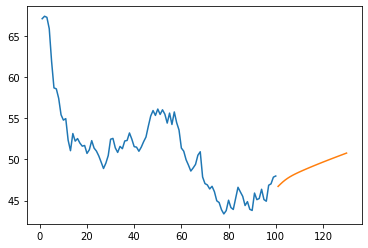

In [239]:
plt.plot(day_new,scaler.inverse_transform(df1[810:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

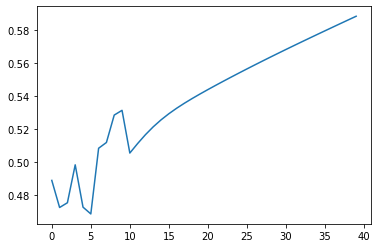

In [241]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [242]:
df3=scaler.inverse_transform(df3).tolist()

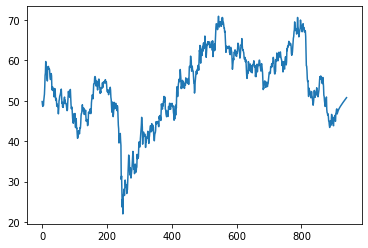

In [243]:
plt.plot(df3)